## 1. Train the model

In [1]:
# load dataset
import tensorflow as tf
from utils.dataset import Dataset
from models.model import EfficientCapsNet

# loads dataset
dataset = Dataset(config_path='config_STSL.json')

# check dataset
dataset.print_ds_info()

[INFO] Dataset loaded!

Shapes of Datasets:
X_train: (2613, 128, 128, 1)
y_train: (2613, 11)
X_val: (327, 128, 128, 1)
y_val: (327, 11)
X_test: (327, 128, 128, 1)
y_test: (327, 11)


Class distribution:
Class    | train | val | test
Class 0  | 234   | 28  | 35  
Class 1  | 248   | 27  | 22  
Class 2  | 239   | 36  | 22  
Class 3  | 239   | 24  | 34  
Class 4  | 233   | 31  | 33  
Class 5  | 228   | 30  | 39  
Class 6  | 240   | 29  | 28  
Class 7  | 239   | 27  | 31  
Class 8  | 236   | 34  | 27  
Class 9  | 235   | 34  | 28  
Class 10 | 242   | 27  | 28  


In [2]:
# instantiate model
model_train = EfficientCapsNet(mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 batch_normalization (Batch  (None, 124, 124, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)  

In [3]:
# train model
history = model_train.train(dataset, initial_epoch=0)

------------------------------EfficientCapsNet train------------------------------
Epoch 1/10
  1/164 [..............................] - ETA: 2:03 - loss: 0.8828 - Efficient_CapsNet_loss: 0.7859 - Generator_loss: 0.2472 - Efficient_CapsNet_accuracy: 0.0000e+00

2023-08-16 14:37:43.411404: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x29f820960 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-16 14:37:43.411424: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-08-16 14:37:43.425694: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


164/164 [==============================] - ETA: 0s - loss: 0.4507 - Efficient_CapsNet_loss: 0.4198 - Generator_loss: 0.0788 - Efficient_CapsNet_accuracy: 0.5714
Epoch 1: val_Efficient_CapsNet_accuracy improved from -inf to 0.08257, saving model to bin/efficient_capsnet_STSL.h5
164/164 [==============================] - 21s 125ms/step - loss: 0.4507 - Efficient_CapsNet_loss: 0.4198 - Generator_loss: 0.0788 - Efficient_CapsNet_accuracy: 0.5714 - val_loss: 0.6397 - val_Efficient_CapsNet_loss: 0.6359 - val_Generator_loss: 0.0097 - val_Efficient_CapsNet_accuracy: 0.0826 - lr: 5.0000e-04
Epoch 2/10
164/164 [==============================] - ETA: 0s - loss: 0.1399 - Efficient_CapsNet_loss: 0.1379 - Generator_loss: 0.0052 - Efficient_CapsNet_accuracy: 0.9001
Epoch 2: val_Efficient_CapsNet_accuracy did not improve from 0.08257
164/164 [==============================] - 20s 124ms/step - loss: 0.1399 - Efficient_CapsNet_loss: 0.1379 - Generator_loss: 0.0052 - Efficient_CapsNet_accuracy: 0.9001 - 

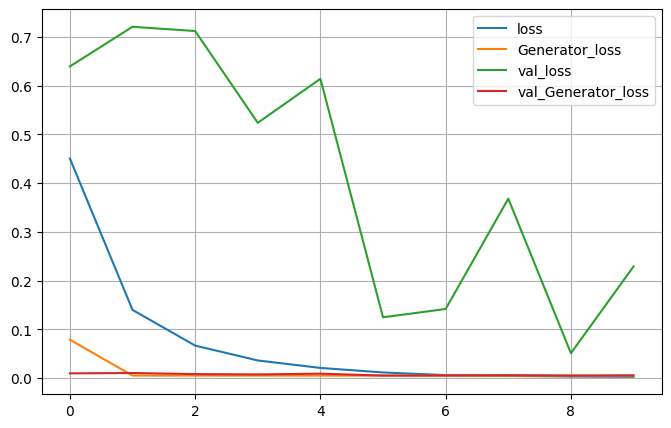

In [4]:
# Plot history
from utils.visualisation import plotImages, plotWrongImages, plotHistory

plotHistory(history)

## 2. Test model

In [2]:
# load test model
model_test = EfficientCapsNet(mode='test', verbose=True)
model_test.load_graph_weights()

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 batch_normalization (Batch  (None, 124, 124, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)  

------------------------------STSL Evaluation------------------------------
 5/11 [============>.................] - ETA: 0s

2023-08-16 15:08:18.696272: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2dc31ff50 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-08-16 15:08:18.696289: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-08-16 15:08:18.711679: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 1s 42ms/step
Test acc: 0.9847094801223242
Test error [%]: 1.5291%
N° misclassified images: 4 out of 327

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        33
           5       1.00      0.97      0.99        39
           6       0.93      1.00      0.97        28
           7       0.97      0.97      0.97        31
           8       0.96      0.93      0.94        27
           9       1.00      1.00      1.00        28
          10       1.00      0.96      0.98        28

    accuracy                           0.98       327
   macro avg       0.98      0.98      0.98       327
weighted avg       0.99      0.98      0.98       327



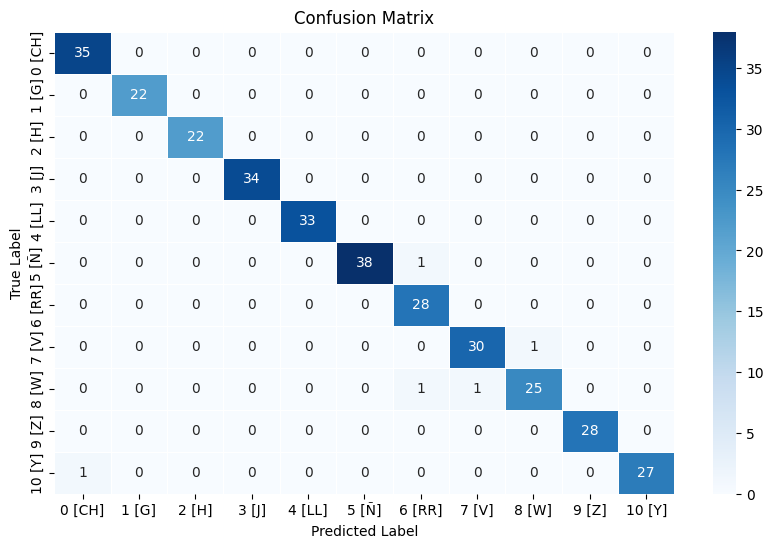

In [3]:
# evaluate
model_test.evaluate(dataset.X_test, dataset.y_test) 

11/11 [==============================] - 0s 36ms/step


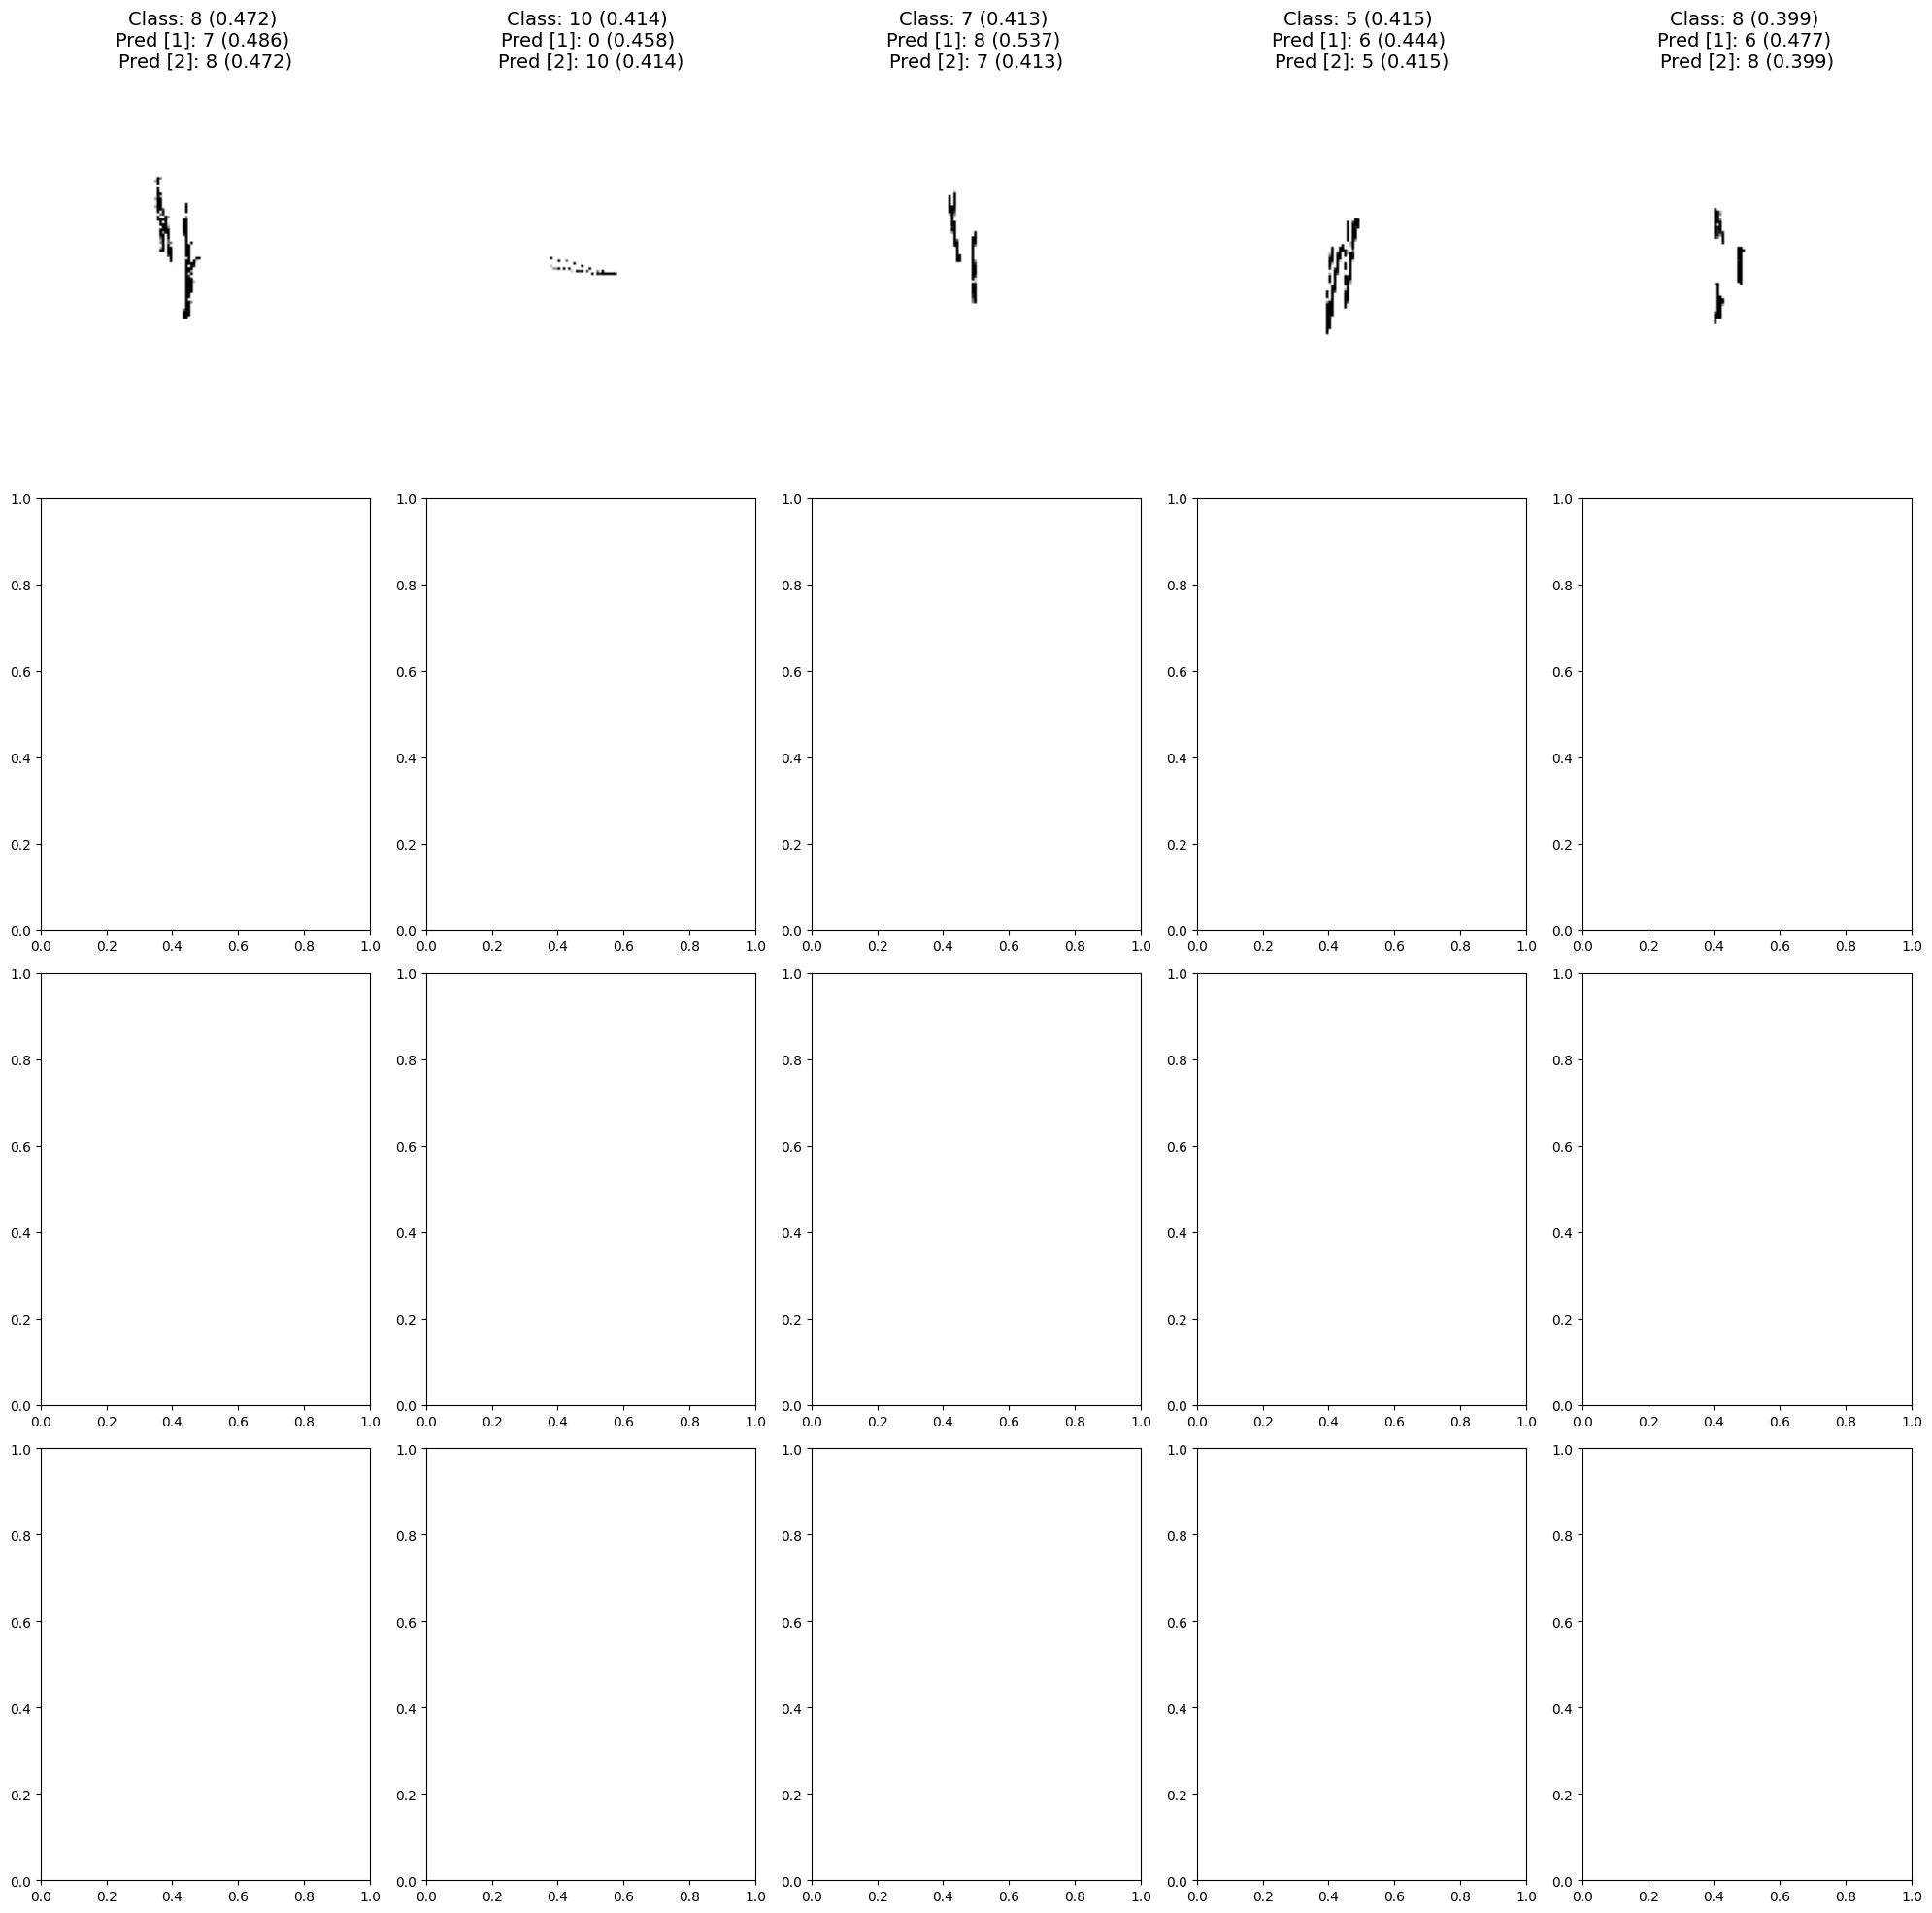

In [4]:
from utils.visualisation import plotWrongImages

# plot
y_pred = model_test.predict(dataset.X_test)[0]

n_images = 20
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, 
                n_images, dataset.class_names)

## 3. Visualise generator reconstruction

11/11 [==============================] - 0s 35ms/step


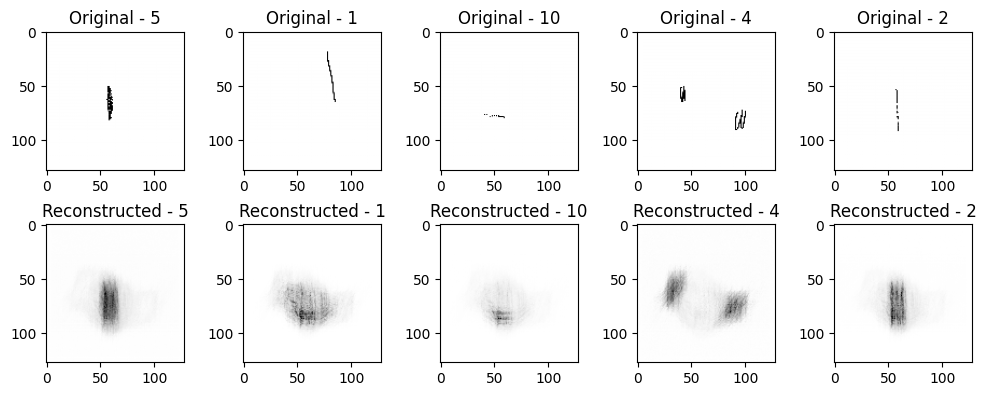

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# pass test data through model
capsule_outputs, reconstructed_images = model_test.predict(dataset.X_test)

# Function to decode one-hot encoded labels
def decode_onehot(onehot_encoded):
    return np.argmax(onehot_encoded)

# Let's visualize the original and reconstructed images for the first few samples
num_images_to_display = 5

plt.figure(figsize=(2*num_images_to_display, 4))

for i in range(num_images_to_display):
    label = decode_onehot(dataset.y_test[i])
    
    # Original images
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(dataset.X_test[i].reshape(128, 128), cmap='gray')
    plt.title(f"Org. {label}")
    plt.axis('on')
    
    # Reconstructed images
    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(reconstructed_images[i].reshape(128, 128), cmap='gray')
    plt.title(f"Rec. {label}")
    plt.axis('on')

plt.tight_layout()
plt.show()
